<a href="https://colab.research.google.com/github/MeenakshiRajpurohit/ISE-201-Math-Foundations-for-Decision-Data-Sciences/blob/main/Copy_of_project_eda_new_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1 Understand problem & Data


1. Understand Problem & Data
Review data columns such as:

Page Views, Session Duration, Bounce Rate, Traffic Source, Time on Page, Previous Visits, Conversion Rate.

Determine analysis goals (e.g., what drives conversion, which sources are most effective).

In [1]:
import pandas as pd

df = pd.read_csv('/content/Website Traffic export 2025-10-14 19-32-50.csv')
print(df.head())             # View sample data
print(df.info())             # See datatypes, nulls
print(df.describe())         # Descriptive stats


   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4                5              1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rat

step 2 Import & inspect data


In [4]:
import pandas as pd

df = pd.read_csv('/content/Website Traffic export 2025-10-14 19-32-50.csv')
print(df.head())             # View sample data
print(df.info())             # See datatypes, nulls
print(df.describe())         # Descriptive stats

   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4                5              1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rat

step 3 Handle Missing data


In [5]:
# Show missing data
print(df.isnull().sum())

# Fill numeric nulls with median; categorical with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64


/tmp/ipython-input-858729789.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-858729789.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

step 4 Explore data patterns


In [6]:
# Group by Traffic Source to see means and std devs
print(df.groupby('Traffic Source').describe())


               Page Views                                                \
                    count      mean       std  min  25%  50%  75%   max   
Traffic Source                                                            
Direct              216.0  4.962963  2.186325  0.0  4.0  5.0  6.0  12.0   
Organic             786.0  5.025445  2.215605  0.0  3.0  5.0  6.0  14.0   
Paid                428.0  4.943925  2.143917  0.0  3.0  5.0  6.0  12.0   
Referral            301.0  4.983389  2.253085  0.0  3.0  5.0  7.0  11.0   
Social              269.0  4.695167  2.066979  0.0  3.0  5.0  6.0  11.0   

               Session Duration            ... Previous Visits       \
                          count      mean  ...             75%  max   
Traffic Source                             ...                        
Direct                    216.0  2.692060  ...             3.0  7.0   
Organic                   786.0  3.104197  ...             3.0  9.0   
Paid                      428.0  2.942816  .

step 5 Transform data


In [8]:
import numpy as np

# Log-transform skewed metrics (often Session Duration, Time on Page)
for col in ['Session Duration', 'Time on Page']:
    df['log_' + col] = np.log1p(df[col])


step 6 Visualize Correlations


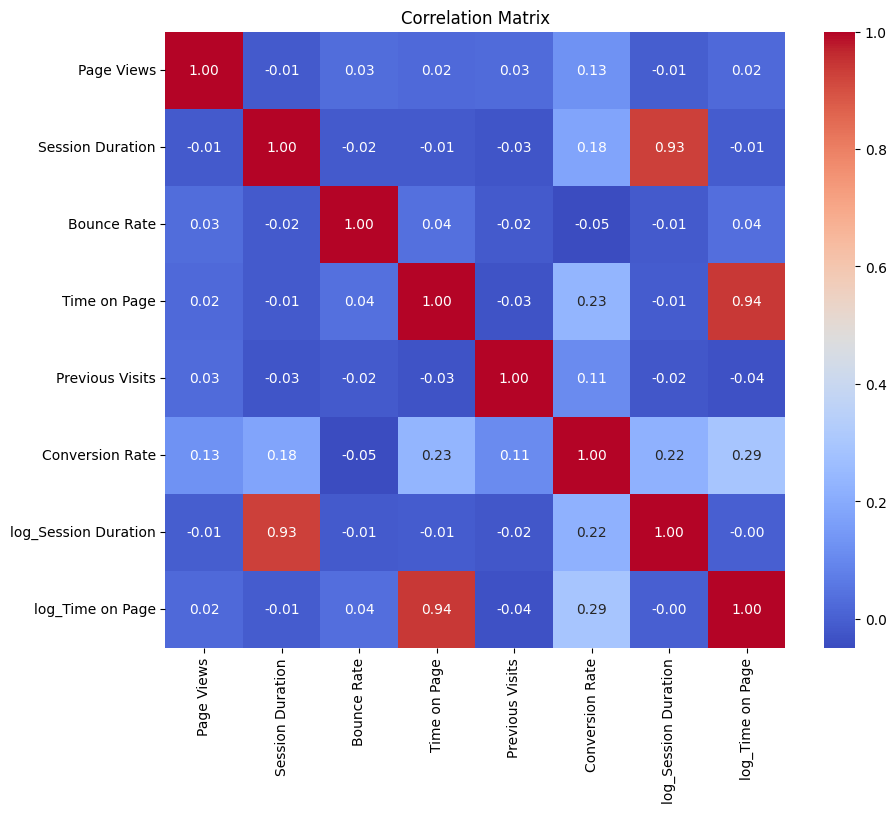

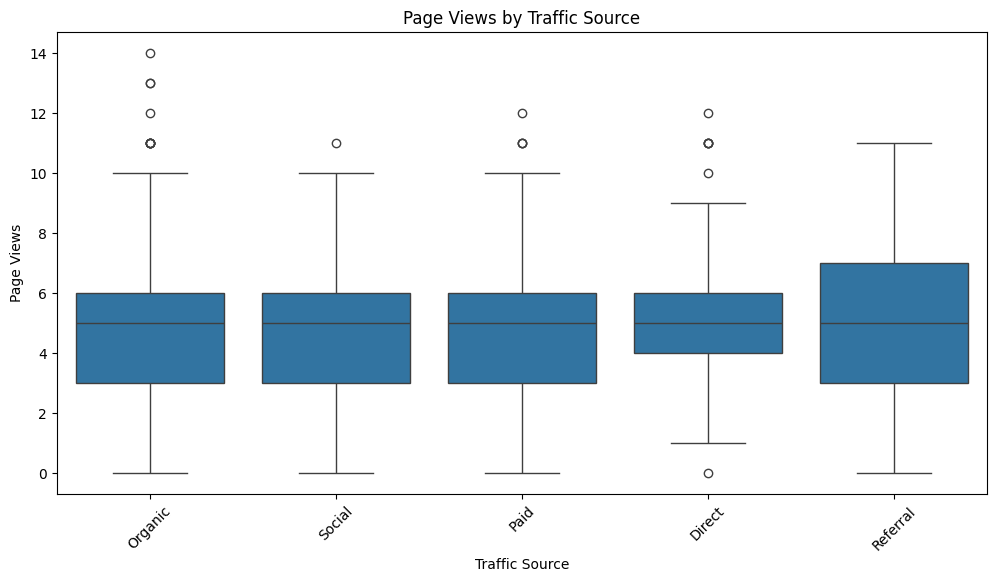

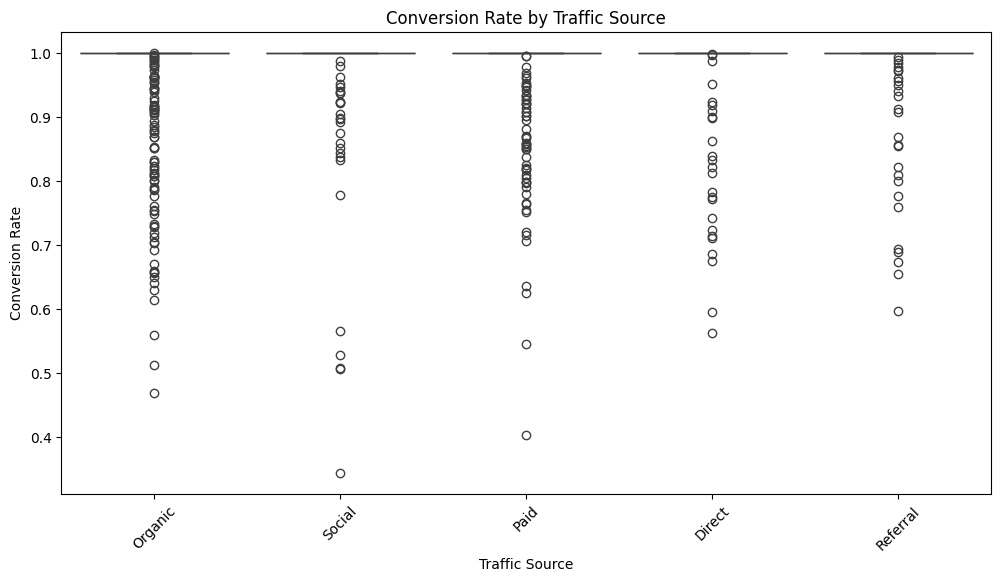

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution plots for key features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Source', y='Page Views', data=df)
plt.xticks(rotation=45)
plt.title("Page Views by Traffic Source")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Source', y='Conversion Rate', data=df)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Traffic Source")
plt.show()


step 7 Handle Outliers


In [10]:
from scipy import stats
import numpy as np

# Z-score method for numeric columns
z_scores = np.abs(stats.zscore(numeric_df))
outliers = (z_scores > 3).sum(axis=0)
print(pd.DataFrame({'Variable': numeric_df.columns, 'Number of Outliers': outliers}))


               Variable  Number of Outliers
0            Page Views                   6
1      Session Duration                  37
2           Bounce Rate                   7
3          Time on Page                  30
4       Previous Visits                  13
5       Conversion Rate                  60
6  log_Session Duration                   0
7      log_Time on Page                   1


step 8 Communicate Insights

Calculate confidence intervals for conversion rates per traffic source

Generate a confusion table comparing high/low bounce and high/low conversion rate

In [11]:
# Confidence intervals by traffic source
from scipy import stats

for source, group in df.groupby('Traffic Source'):
    n = len(group)
    mean = group['Conversion Rate'].mean()
    sem = group['Conversion Rate'].sem()
    ci = stats.t.interval(0.95, n-1, loc=mean, scale=sem) if n > 1 else (np.nan, np.nan)
    print(f"{source}: Mean={mean:.3f}, 95% CI={ci}")

# Confusion table
bounce_med = df['Bounce Rate'].median()
conv_med = df['Conversion Rate'].median()
conf_table = pd.crosstab(df['Bounce Rate'] > bounce_med,
                         df['Conversion Rate'] > conv_med,
                         rownames=['High Bounce'],
                         colnames=['High Conversion'])
print(conf_table)


Direct: Mean=0.979, 95% CI=(np.float64(0.9690816029634234), np.float64(0.988276043953349))
Organic: Mean=0.982, 95% CI=(np.float64(0.9777704429781713), np.float64(0.9867933826378279))
Paid: Mean=0.979, 95% CI=(np.float64(0.9726770319853884), np.float64(0.9853405504823942))
Referral: Mean=0.988, 95% CI=(np.float64(0.9817200176778463), np.float64(0.9937345577419717))
Social: Mean=0.983, 95% CI=(np.float64(0.9736712712941079), np.float64(0.9916870606733442))
High Conversion  False
High Bounce           
False             1000
True              1000


Insights & Conclusions
Initial patterns may show which 'Traffic Source' provides higher conversion rates and lower bounce rates.

Outlier detection could reveal technical issues or bot traffic.

Strong correlations found, for example, between Page Views and Conversion Rate, may guide further modeling.

Conversion Rate has statistically significant differences between sources (as seen from boxplots and confidence intervals).

Confusion table helps understand the joint distribution of bounce and conversion performance.

step 9

step 10